In [1]:
%load_ext autoreload
%autoreload 2

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ib_insync import *
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from optopus.ib_adapter import IBBrokerAdapter
from optopus.optopus import Optopus
from optopus.utils import pdo


%matplotlib inline

In [2]:
# port = 7497 TWS paper trading
util.startLoop()
opt = Optopus(IBBrokerAdapter(IB(), host='127.0.0.1', port=7496, client=7))
opt.start()

[Initializating managers]
[Connecting to IB broker]
[Updating portfolio]
[Adding underlyings]
- Initializing underlyings:	........................
- Retriving current data:	........................
- Retriving historical data:	........................
- Retriving historical IV data:	........................
- Computing fields:		........................
[Started]



In [3]:
df = pdo(opt.assets(['IV_h', 'IV_rank_h', 'IV_percentile_h', 'one_month_return', 'correlation']))

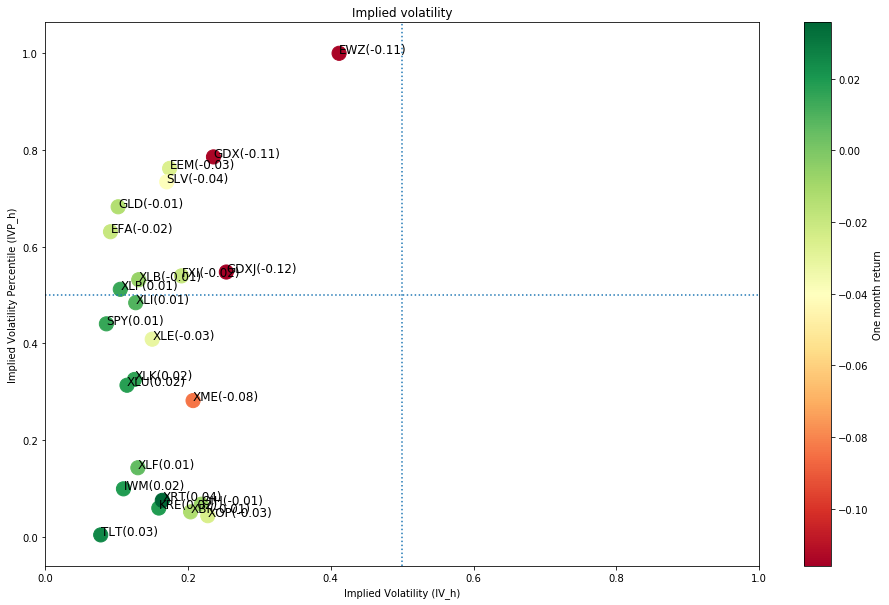

In [4]:
#ax = df.plot(kind='scatter', x='IV_h', y='IV_percentile_h', c='one_month_return', colormap='RdYlGn', s=200, figsize=(14,8))
plt.figure(figsize=(16, 10))
sc = plt.scatter(x=df['IV_h'].values, y=df['IV_percentile_h'].values, c=df['one_month_return'].values, cmap='RdYlGn', s=200)
plt.colorbar(sc).set_label('One month return')
plt.title('Implied volatility')
plt.xlabel('Implied Volatility (IV_h)')
plt.ylabel('Implied Volatility Percentile (IVP_h)')
plt.xlim(0, 1)
plt.axvline(0.5, linestyle='dotted')
plt.axhline(0.5, linestyle='dotted')
for i, row in df.iterrows():
    label = row['code'] + '({0:0.2f})'.format(row['one_month_return'])
    plt.annotate(label, (row['IV_h'], row['IV_percentile_h']), fontsize=12, color='black')

In [11]:
df[['code', 'correlation']].sort_values(['correlation'], ascending=False).style.background_gradient(cmap='RdYlGn')

ValueError: Function <function Styler._background_gradient at 0x7fa12a50eea0> returned the wrong shape.
Result has shape: (0,)
Expected shape:   (2, 0)

In [13]:
dfT=df[['code', 'correlation']].sort_values(['correlation'], ascending=False).T

In [28]:
dfT = dfT.unstack().unstack().unstack()

In [33]:
dfT[['code', 'correlation']].reset_index()

,index,code,correlation
0,11,SPY,1
1,18,XLK,0.912765
2,17,XLI,0.870358
3,14,XLB,0.853049
4,7,IWM,0.839643
5,16,XLF,0.822267
6,1,EFA,0.807705
7,0,EEM,0.766991
8,13,XBI,0.656725
9,3,FXI,0.647657
